In [96]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
import ompy as om
from pathlib import Path

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
p = Path("../OCL_response_functions/oscar2017_scale1.15/")
R = om.Response(p, suffix='')

<IPython.core.display.Javascript object>


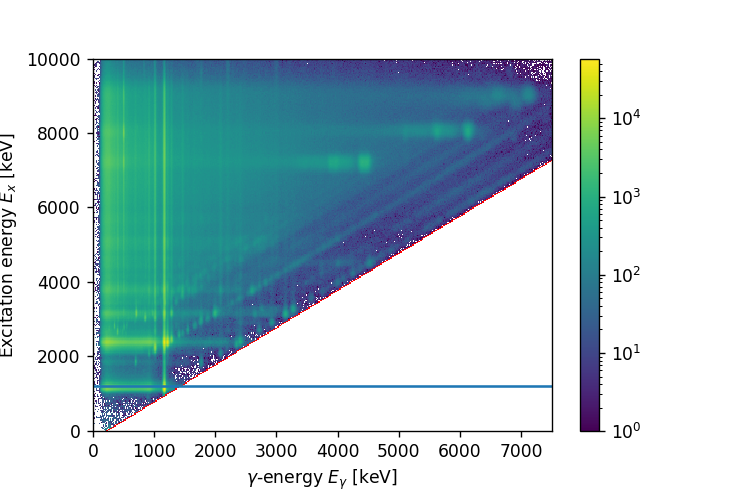

<IPython.core.display.Javascript object>


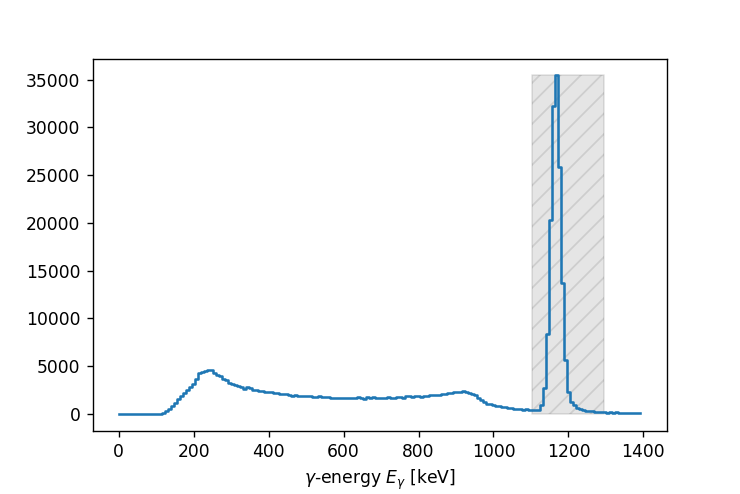

In [69]:
m = om.Matrix(path='120Sn_raw_without_bg.m')
m = m.loc[:'10MeV', :'7.5MeV']
line = om.Line(p1=('1MeV', '0.75MeV'), slope=1)
m[line.above(m)] = 0
ax, _ = m.plot()
ax.axhline(y=1200)
line.plot(m, ax=ax)
spectrum = m.loc['1.2MeV', :'1.4MeV']
ax = spectrum.plot()
region = (1.1e3 < spectrum.E) & (spectrum.E < 1.3e3)
#e = spectrum.E[region]
#ax.fill_betweenx(range(int(max(spectrum))), min(e), max(e), color='k', alpha=0.1, )
ax.fill_between(spectrum.E, max(spectrum.values), where=region, color='k', alpha=0.1, hatch='//')

In [75]:
c = om.response.calibrator.Calibrator(R, spectrum)

<AxesSubplot:xlabel='Energy [$\\mathrm{keV}$]'>

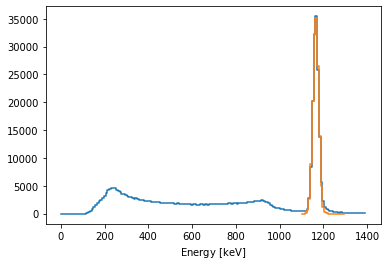

In [93]:
fit = c.fit_FWHM(region)
ax = spectrum.plot()
fit.plot(ax=ax)

In [94]:
c.calibrate_FWHM()

p0: [1200.0, 153853.0]
 final_simplex: (array([[  1162.38154449, 487929.10864054],
       [  1162.38146148, 487929.10862023],
       [  1162.38157875, 487929.10860941]]), array([1989354.7448458, 1989354.7448458, 1989354.7448458]))
           fun: 1989354.7448457961
       message: 'Optimization terminated successfully.'
          nfev: 150
           nit: 76
        status: 0
       success: True
             x: array([  1162.38154449, 487929.10864054])


<IPython.core.display.Javascript object>


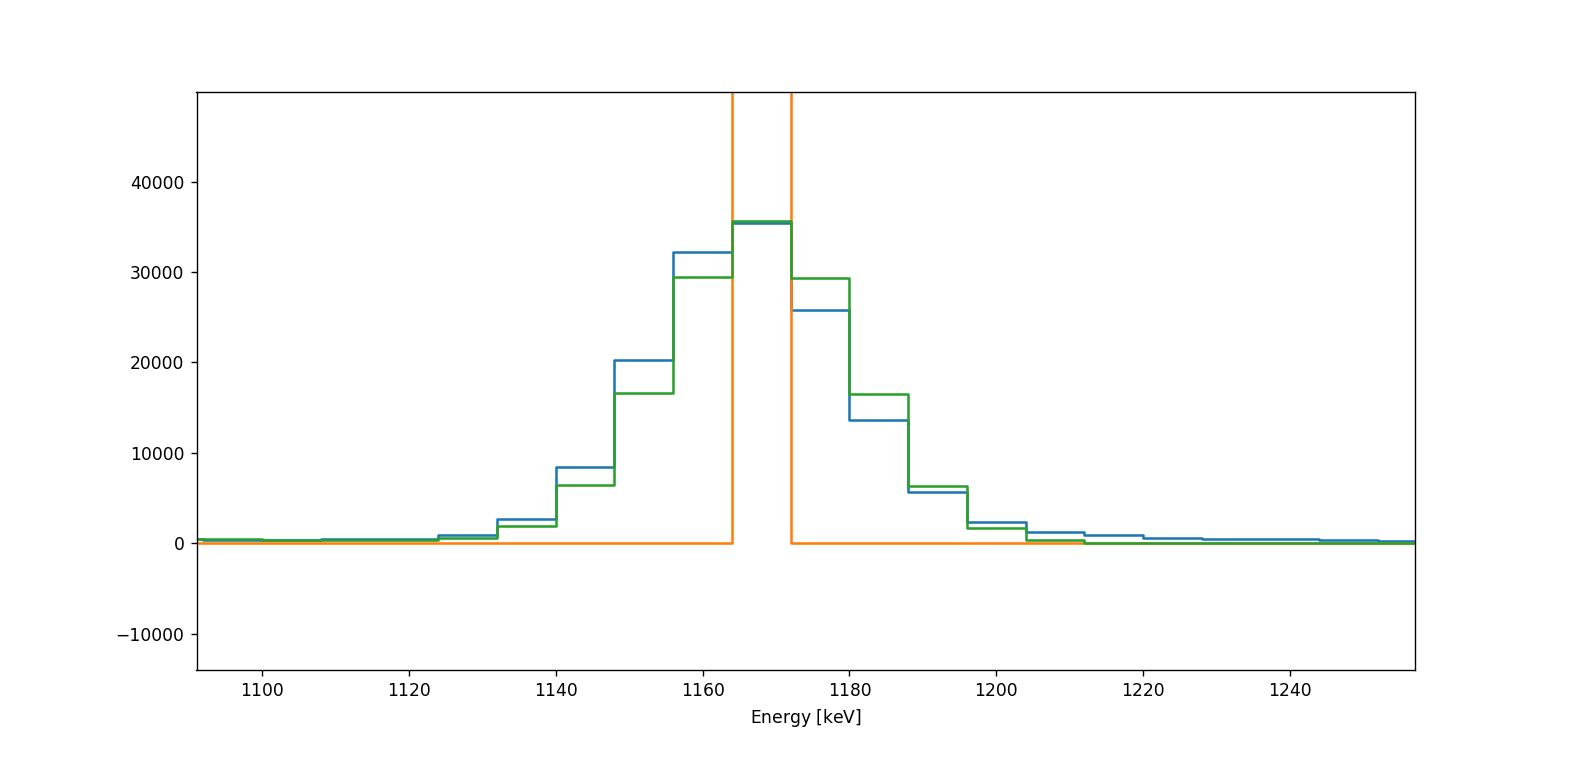

In [99]:
c.fit_FE(region)

# 167Ho

In [22]:
holm = om.Matrix(path="./167Ho_raw.m")
holm2 = om.Matrix(path="./167Ho_raw_with_bg.m")

<AxesSubplot:xlabel='$\\gamma$-energy $E_{\\gamma}$ [$\\mathrm{keV}$]', ylabel='Excitation energy $E_{x}$ [$\\mathrm{keV}$]'>

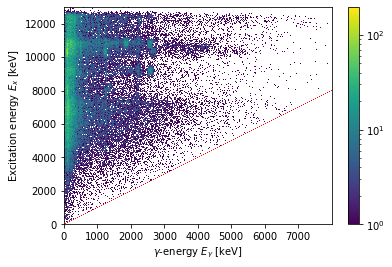

In [23]:
holm = holm.loc[:'13MeV', :'8MeV']
line = om.Line(slope=1, p1=(0,0))
holm[line.above(holm)] = 0
ax, _ = holm.plot()
line.plot(holm, ax=ax)

In [6]:
holm.summary()

Eᵧ: 0.0 to 16376.0 [keV]
2048 bins with dEᵧ: 8.0
Eₓ: 0.0 to 16376.0 [keV]
2048 bins with dEₓ: 8.0
Total counts: 2,200,966.0



In [7]:
holm2.plot()

<IPython.core.display.Javascript object>

(<AxesSubplot:xlabel='$\\gamma$-energy $E_{\\gamma}$ [$\\mathrm{keV}$]', ylabel='Excitation energy $E_{x}$ [$\\mathrm{keV}$]'>,
 (<matplotlib.collections.QuadMesh at 0x7fc5f2f2c100>,
  <matplotlib.colorbar.Colorbar at 0x7fc5f2f4eaa0>))

In [8]:
bg = holm2 - holm
bg.plot()

<IPython.core.display.Javascript object>

(<AxesSubplot:xlabel='$\\gamma$-energy $E_{\\gamma}$ [$\\mathrm{keV}$]', ylabel='Excitation energy $E_{x}$ [$\\mathrm{keV}$]'>,
 (<matplotlib.collections.QuadMesh at 0x7fc5f3516da0>,
  <matplotlib.colorbar.Colorbar at 0x7fc5f3499150>))